# Loss Function Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.array([[0.2, 0.1], [0.55, 0.15], [0.8, 0.5], [0.95, 0.55]])

In [3]:
def Jm(x, y, m, b):
    return 2*np.sum(x*(y-m*x-b))
def Jmm(x):
    return 2*np.sum(-(x**2))
def Jb(x, y, m, b):
    return 2*np.sum(y-m*x-b)
def Jbb(x):
    return 2*(-len(x))

In [4]:
## Newton-Raphson Method to update m & b value
def nr_method(old_var, learning_rate, fx, der_fx):
    """"
    parameter :
    - old_var           = previous variable
    - learning_rate     = hyperparameter / change rate to get optimal value
    - fx                = value of function 
    - der_fx            = derrivative value of function 
    """
    return old_var-learning_rate*(fx/der_fx)

## Case 1 Simultant

In [5]:
def loss_function_opt(x, y, m_0, b_0, learning_rate=1, max_iter=1000, error_approx_digit = 3):
    """
    parameter : 
    - x                 = x input data point
    - y                 = y output data point
    - m_0               = first initialization of m
    - b_0               = first initializatoin of b
    - learning_rate     = hyperparameter / change rate to get optimal function
    - max_iter          = max iteration
    - error_approx_digit= error tolerance digit 10^n

    output :
    - m_array           = array hchange of m
    - b_array           = array change of b
    - Jm_array          = derrivative of J Function with respect of m
    - Jmm_array         = derrivative of Jm Function with respect of m
    - Jb_array          = derrivative of Jb Function with respect of b
    - Jbb_array         = derrivative of Jb Function with respect of b
    - eam               = error approximmation array of m
    - eab               = error approximation array of b
    """
    m = m_0
    b = b_0
    m_array = np.zeros(0)
    b_array = np.zeros(0)

    jm_array = np.zeros(0)
    jmm_array = np.zeros(0)
    jb_array = np.zeros(0)
    jbb_array = np.zeros(0)
    eam_array = np.zeros(0)
    eab_array = np.zeros(0)
    eam_array = np.append(eam_array, "None")
    eab_array = np.append(eab_array, "None")


    for i in range(max_iter):
        jm = Jm(x, y, m, b)
        jmm = Jmm(x)
        jb = Jb(x, y, m, b)
        jbb = Jbb(x)

        jm_array = np.append(jm_array, jm)
        jmm_array = np.append(jmm_array, jmm)
        jb_array = np.append(jb_array, jb)
        jbb_array = np.append(jbb_array, jbb)
        m_array = np.append(m_array, m)
        b_array = np.append(b_array, b)

        m = nr_method(m,learning_rate, jm, jmm)
        b = nr_method(b, learning_rate, jb, jbb)
        
        if (i>0):
            eam = np.abs((m_array[i]-m_array[i-1])/m_array[i])
            eab = np.abs((b_array[i]-b_array[i-1])/b_array[i])
            eam_array = np.append(eam_array, np.round(eam,4))
            eab_array = np.append(eab_array, np.round(eab,4))

            #check if error under tolerance
            if(eam<10**-error_approx_digit and eab<10**-error_approx_digit):
                print("iteration break at ", i+1)
                break

    return m_array, b_array, jm_array, jmm_array, jb_array, jbb_array, eam_array, eab_array

## Case 2 (Optimize alternately)

In [6]:
def loss_function_opt2(x, y, m_0, b_0, learning_rate=1, max_iter=1000, error_approx_digit = 3):
    """
    parameter : 
    - x                 = x input data point
    - y                 = y output data point
    - m_0               = first initialization of m
    - b_0               = first initializatoin of b
    - learning_rate     = hyperparameter / change rate to get optimal function
    - max_iter          = max iteration
    - error_approx_digit= error tolerance digit 10^n

    output :
    - m_array           = array hchange of m
    - b_array           = array change of b
    - Jm_array          = derrivative of J Function with respect of m
    - Jmm_array         = derrivative of Jm Function with respect of m
    - Jb_array          = derrivative of Jb Function with respect of b
    - Jbb_array         = derrivative of Jb Function with respect of b
    - eam               = error approximmation array of m
    - eab               = error approximation array of b
    """
    m = m_0
    b = b_0
    m_array = np.zeros(0)
    b_array = np.zeros(0)

    jm_array = np.zeros(0)
    jmm_array = np.zeros(0)
    jb_array = np.zeros(0)
    jbb_array = np.zeros(0)
    eam_array = np.zeros(0)
    eab_array = np.zeros(0)
    eam_array = np.append(eam_array, "None")
    eab_array = np.append(eab_array, "None")

    Counter = 0
    j = 0
    end_iter = 0
    while(j>=0):
        
        # iteration for optimize m coefficient
        for i in range(10):
            jm = Jm(x, y, m , b)
            jmm = Jmm(x)
            jb = Jb(x, y, m , b)
            jbb = Jbb(x)

            jm_array = np.append(jm_array, jm)
            jmm_array = np.append(jmm_array, jmm)
            jb_array = np.append(jb_array, jb)
            jbb_array = np.append(jbb_array, jbb)
            m_array = np.append(m_array, m)
            b_array = np.append(b_array, b)

            m = nr_method(m,learning_rate, jm, jmm)

            if ((i>0) or (j>0)):
                eam = np.abs((m_array[-1]-m_array[-2])/m_array[-1])
                eam_array = np.append(eam_array, np.round(eam,5))
                eab = np.abs((b_array[-1]-b_array[-2])/b_array[-1])
                eab_array = np.append(eab_array, np.round(eab,5))
            
            #check if jm is zero which is m optimized
            if (np.round(np.abs(jm),5) < 10**-5):
                end_iter = i+1
                break
        
        Counter += end_iter

        # update b value before starting estimate
        b = nr_method(b,learning_rate, jb, jbb)
        
        # iteration for optimize b coefficient
        for i in range(10):
            jm = Jm(x, y, m , b)
            jmm = Jmm(x)
            jb = Jb(x, y, m , b)
            jbb = Jbb(x)

            jm_array = np.append(jm_array, jm)
            jmm_array = np.append(jmm_array, jmm)
            jb_array = np.append(jb_array, jb)
            jbb_array = np.append(jbb_array, jbb)
            m_array = np.append(m_array, m)
            b_array = np.append(b_array, b)

            b = nr_method(b,learning_rate, jb, jbb)

            eam = np.abs((m_array[-1]-m_array[-2])/m_array[-1])
            eam_array = np.append(eam_array, np.round(eam,5))
            eab = np.abs((b_array[-1]-b_array[-2])/b_array[-1])
            eab_array = np.append(eab_array, np.round(eab,5))
            
            #check if jb is zero which is b optimized
            if (np.round(np.abs(jb),5) < 10**-5):
                end_iter = i+1
                break
        
        Counter += end_iter

        # update m value before starting estimate
        m = nr_method(m,learning_rate, jm, jmm)

        if (eam < 10**-error_approx_digit and eab < 10**-error_approx_digit) or Counter>max_iter:
            print("iteration break at ",Counter)
            break

        j += 1
       
    return m_array, b_array, jm_array, jmm_array, jb_array, jbb_array, eam_array, eab_array

## Case 1 Simultant

In [7]:
m_array, b_array, jm, jmm, jb, jbb, eam, eab = loss_function_opt(data[:,0], data[:,1], 0, 1, 1, 100, 3)

df = pd.DataFrame({"m": np.round(m_array,4), "jm":np.round(jm,4), "jmm":jmm, "eam":eam, "b": np.round(b_array,4), "jb":np.round(jb,4), "jbb":jbb, "eab":eab})

# set starting point 1
df.index += 1
# print all values
with pd.option_context('display.max_rows', None):  # more options can be specified also
    display(df)

iteration break at  97


,m,jm,jmm,eam,b,jb,jbb,eab
1,0.0000,-2.9500,-3.77,None,1.0000,-5.4000,-8.0,None
2,-0.7825,3.3750,-3.77,1.0,0.3250,3.9125,-8.0,2.0769
3,0.1127,-2.4453,-3.77,7.9412,0.8141,-4.4761,-8.0,0.6008
4,-0.5359,2.7976,-3.77,1.2104,0.2545,3.2431,-8.0,2.1981
5,0.2062,-2.0269,-3.77,3.5992,0.6599,-3.7103,-8.0,0.6143
6,-0.3315,2.3189,-3.77,1.622,0.1961,2.6882,-8.0,2.3646
7,0.2836,-1.6801,-3.77,2.1687,0.5322,-3.0755,-8.0,0.6314
8,-0.1620,1.9222,-3.77,2.7505,0.1477,2.2283,-8.0,2.6024
9,0.3478,-1.3927,-3.77,1.4658,0.4263,-2.5493,-8.0,0.6534
10,-0.0216,1.5933,-3.77,17.1223,0.1076,1.8471,-8.0,2.9616


## Verify with plotting graph

y = 0.6588x + -0.0867


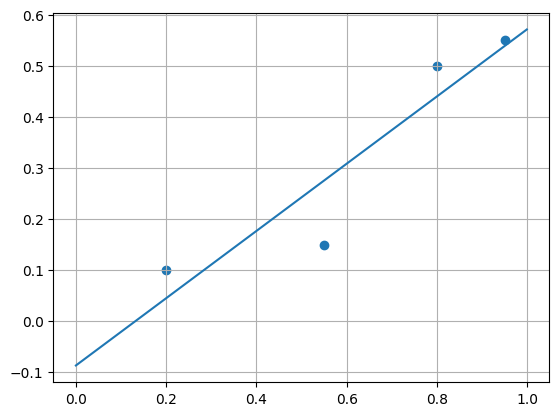

In [8]:
m = m_array[-1]
b = b_array[-1]

x = np.arange(0,1,0.001)
y = m*x+b
print("y = {}x + {}".format(round(m,4),round(b,4)))

plt.scatter(data[:,0],data[:,1])
plt.plot(x,y)
plt.grid(True)

## Case 2 (Optimize Alternately)

In [9]:
m_array, b_array, jm, jmm, jb, jbb, eam, eab = loss_function_opt2(data[:,0], data[:,1], 0, 1, 1, 100, 3)

df = pd.DataFrame({"m": np.round(m_array,4), "jm":np.round(jm,4), "jmm":jmm, "eam":eam, "b": np.round(b_array,4), "jb":np.round(jb,4), "jbb":jbb, "eab":eab})

# set starting point 1
df.index += 1
# print all values
with pd.option_context('display.max_rows', None):  # more options can be specified also
    display(df)

iteration break at  85


,m,jm,jmm,eam,b,jb,jbb,eab
1,0.0000,-2.9500,-3.77,None,1.0000,-5.4000,-8.0,None
2,-0.7825,0.0000,-3.77,1.0,1.0000,-1.4875,-8.0,0.0
3,-0.7825,0.9297,-3.77,0.0,0.8141,0.0000,-8.0,0.22841
4,-0.5359,0.0000,-3.77,0.46019,0.8141,-1.2330,-8.0,0.0
5,-0.5359,0.7706,-3.77,0.0,0.6599,-0.0000,-8.0,0.23355
6,-0.3315,0.0000,-3.77,0.61669,0.6599,-1.0221,-8.0,0.0
7,-0.3315,0.6388,-3.77,0.0,0.5322,-0.0000,-8.0,0.24007
8,-0.1620,-0.0000,-3.77,1.04576,0.5322,-0.8472,-8.0,0.0
9,-0.1620,0.5295,-3.77,0.0,0.4263,0.0000,-8.0,0.24844
10,-0.0216,-0.0000,-3.77,6.50996,0.4263,-0.7023,-8.0,0.0


## Verify with Plotting Graph (Case 2)

y = 0.6583x + -0.0864


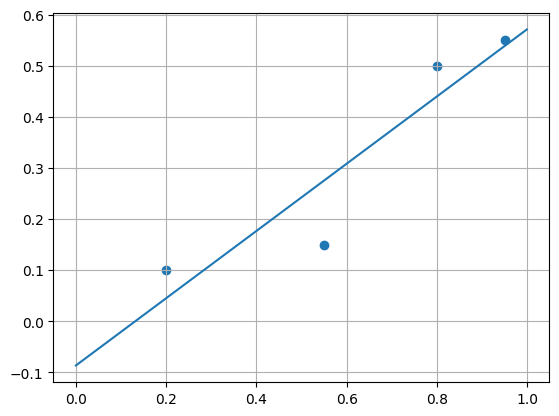

In [10]:
m = m_array[-1]
b = b_array[-1]

x = np.arange(0,1,0.001)
y = m*x+b
print("y = {}x + {}".format(round(m,4),round(b,4)))

plt.scatter(data[:,0],data[:,1])
plt.plot(x,y)
plt.grid(True)